In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.express as px

In [2]:
# Pandas datetime index
pd.date_range('2020-10-01', periods=15, freq='D')


DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12',
               '2020-10-13', '2020-10-14', '2020-10-15'],
              dtype='datetime64[ns]', freq='D')

In [6]:
pd.date_range('Oct 01, 2020', periods=30, freq='D')

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12',
               '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16',
               '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24',
               '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28',
               '2020-10-29', '2020-10-30'],
              dtype='datetime64[ns]', freq='D')

In [7]:
pd.to_datetime(['10/01/2020', '10/02/2020'], format='%d/%m/%Y')

DatetimeIndex(['2020-01-10', '2020-02-10'], dtype='datetime64[ns]', freq=None)

In [8]:
arr_1 = np.random.randint(10, 50, size=(3, 3))
date_arr = pd.date_range('2020-01-01', periods=3, freq='D')
df_1 = pd.DataFrame(arr_1, columns=['A', 'B', 'C'], index=date_arr)
df_1

,A,B,C
2020-01-01,16,31,29
2020-01-02,13,13,19
2020-01-03,23,35,36


In [9]:
df_1.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [11]:
df_1.index.argmax()

2

In [12]:
# Time resampling

df_appl = pd.read_csv('appl.csv')
px.line(df_appl, x='AAPL_x', y='AAPL_y', labels={'x': 'Date', 'y': 'Price'})

In [13]:
df_appl.head()

,AAPL_x,AAPL_y
0,2014-01-02,77.445395
1,2014-01-03,77.045575
2,2014-01-06,74.896972
3,2014-01-07,75.856461
4,2014-01-08,75.091947


In [15]:
df_appl = pd.read_csv('appl.csv', index_col='AAPL_x', parse_dates=True)
df_appl

,AAPL_y
AAPL_x,
2014-01-02,77.445395
2014-01-03,77.045575
2014-01-06,74.896972
2014-01-07,75.856461
2014-01-08,75.091947
...,...
2014-12-08,113.653345
2014-12-09,109.755497
2014-12-10,113.960331


In [19]:
arr_2 = np.random.randint(86000000, 256000000, size=240)
df_appl['Volume'] = arr_2
df_appl.rename(columns={'AAPL_y': 'Price'}, inplace=True)
df_appl

,Price,Volume
AAPL_x,,
2014-01-02,77.445395,249888233
2014-01-03,77.045575,240588507
2014-01-06,74.896972,100342539
2014-01-07,75.856461,211336201
2014-01-08,75.091947,88880472
...,...,...
2014-12-08,113.653345,224330617
2014-12-09,109.755497,249637436
2014-12-10,113.960331,88927294


In [20]:
df_appl.resample(rule='A').mean()

,Price,Volume
AAPL_x,,
2014-12-31,90.102612,1.676328e+08


In [21]:
df_appl.resample(rule='A').max()

,Price,Volume
AAPL_x,,
2014-12-31,118.798656,255422464


In [22]:
df_appl['Price'].resample('A').std()

AAPL_x
2014-12-31    13.315813
Freq: A-DEC, Name: Price, dtype: float64

In [27]:
df_appl['Price'].resample('Q').mean()

AAPL_x
2014-03-31     74.507413
2014-06-30     83.694374
2014-09-30     97.128900
2014-12-31    107.513069
Freq: Q-DEC, Name: Price, dtype: float64

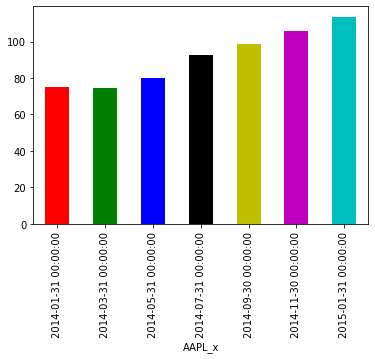

In [28]:
df_appl['Price'].resample(rule='2M').mean().plot.bar(color=list('rgbkymc'))

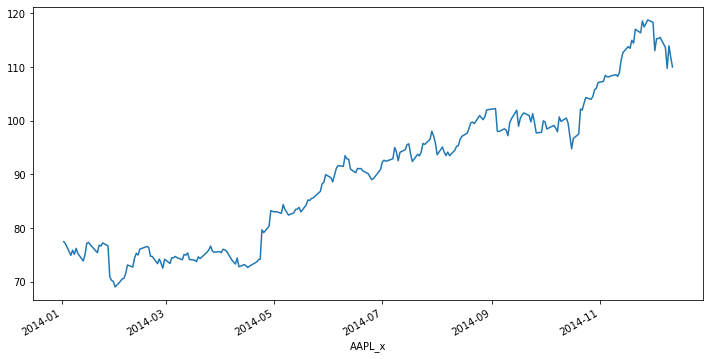

In [29]:
# Moving averages

df_appl['Price'].plot(figsize=(12, 6))

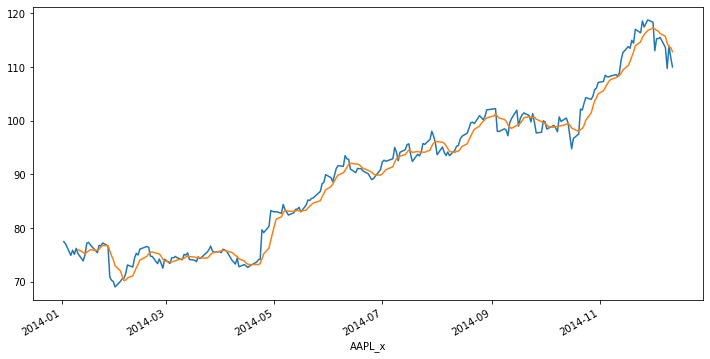

In [31]:
df_appl['Price'].plot(figsize=(12, 6))
df_appl.rolling(window=7).mean()['Price'].plot()

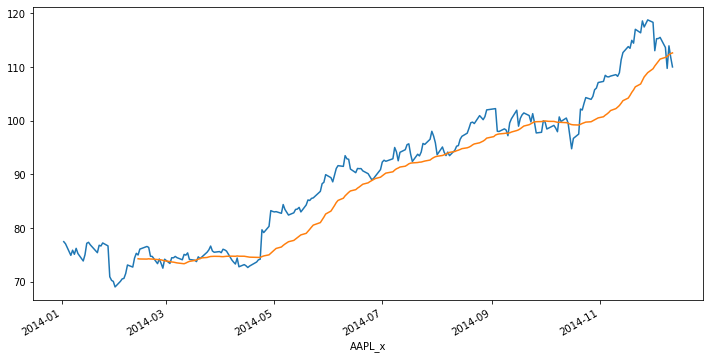

In [32]:
df_appl['Price'].plot(figsize=(12, 6))
df_appl.rolling(window=30).mean()['Price'].plot()

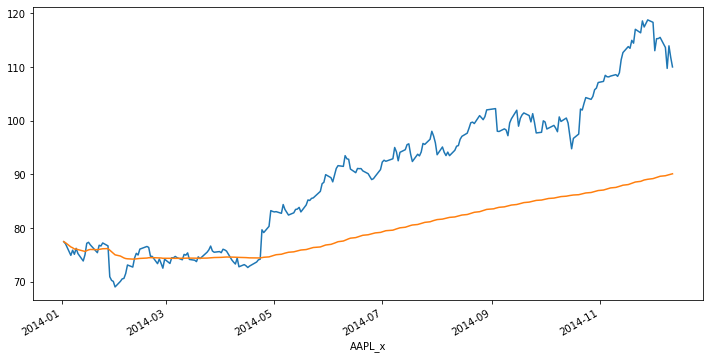

In [33]:
df_appl['Price'].plot(figsize=(12, 6))
df_appl['Price'].expanding().mean().plot(figsize=(12, 6))

In [36]:
# Shifting time data

df_appl.shift(3)

,Price,Volume
AAPL_x,,
2014-01-02,NaN,NaN
2014-01-03,NaN,NaN
2014-01-06,NaN,NaN
2014-01-07,77.445395,249888233.0
2014-01-08,77.045575,240588507.0
...,...,...
2014-12-08,115.290714,94695963.0
2014-12-09,115.318909,205283164.0
2014-12-10,115.536126,211755128.0
